# Challenge: Which test to use
Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the [data file](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv). And here is the [codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html), with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline

In [71]:
ess = pd.read_csv('ESSdata.csv')
ess.columns = ['country', 'id_num','year','tv_tot',
               'ppl_trust','ppl_fair','ppl_help','happy',
               'meet','rel_act','gender','age','partner']
ess['year'] = np.where(ess['year']==6,2012,2014)
ess['gender'] = np.where(ess['gender']==1, 'male', 'female')
ess['partner'] = np.where(ess['partner']==1, 'lives with partner', 'does not live with partner')
ess = ess.dropna()

cols = ['tv_tot','ppl_trust','ppl_fair','ppl_help','happy','meet','rel_act']

# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ess[cols])
scaled_df = pd.DataFrame(scaled_df, columns=cols)
ess_scaled = pd.merge(scaled_df , ess[['country','year','gender','partner','age']],left_index=True,right_index=True)

ess_2012 = ess_scaled[ess_scaled['year']==2012]
ess_2014 = ess_scaled[ess_scaled['year']==2014]

### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2d8fd828>,
      dtype=object)

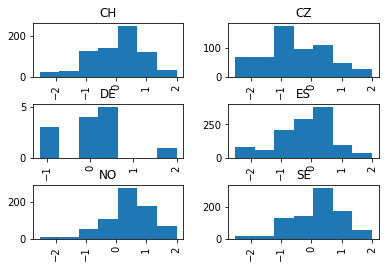

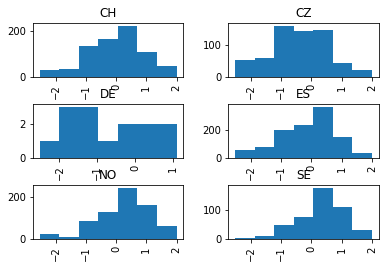

In [107]:
ess_2012['ppl_trust'].hist(by=ess_2012['country'],bins=7)
ess_2014['ppl_trust'].hist(by=ess_2014['country'],bins=7)


In [74]:
#Assumes Non-Normal Dist
c = ['CH','CZ','NO','DE','ES','SE']
for a in c:
    print(a,'results')
    print(stats.kruskal(
        ess_2012[ess_2012['country']==a]['ppl_trust'],
        ess_2014[ess_2014['country']==a]['ppl_trust']),'\n')


CH results
KruskalResult(statistic=0.36104942139017565, pvalue=0.5479239906435152) 

CZ results
KruskalResult(statistic=6.838517555331027, pvalue=0.008921284353201843) 

NO results
KruskalResult(statistic=9.819735681977823, pvalue=0.0017264915214608733) 

DE results
KruskalResult(statistic=4.2765556253928265, pvalue=0.03864157765410612) 

ES results
KruskalResult(statistic=8.035909584935972, pvalue=0.004585897608707064) 

SE results
KruskalResult(statistic=6.932950680539788, pvalue=0.008462196555087875) 



All countries except CH showed significant difference in the trust they had in other people.

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2c951c88>,
      dtype=object)

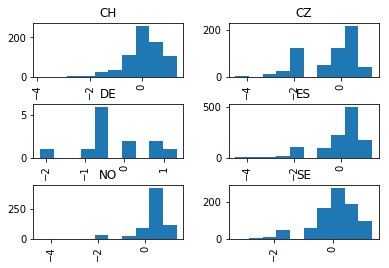

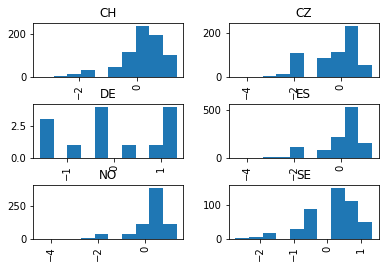

In [78]:
ess_2012['happy'].hist(by=ess_2012['country'])
ess_2014['happy'].hist(by=ess_2014['country'])

In [81]:
#Assumes Non-Normal Dist
c = ['CH','CZ','NO','DE','ES','SE']
for a in c:
    print(a,'results')
    print(stats.kruskal(
        ess_2012[ess_2012['country']==a]['happy'],
        ess_2014[ess_2014['country']==a]['happy']),'\n')

CH results
KruskalResult(statistic=0.28307640380572896, pvalue=0.5946918858284529) 

CZ results
KruskalResult(statistic=1.597532542442237, pvalue=0.2062532362266048) 

NO results
KruskalResult(statistic=5.996678130389241, pvalue=0.014332840580074297) 

DE results
KruskalResult(statistic=0.030701754385956768, pvalue=0.8609074289269546) 

ES results
KruskalResult(statistic=0.6335452340530535, pvalue=0.42605787306339105) 

SE results
KruskalResult(statistic=0.8030391364795552, pvalue=0.37018626823620016) 



NO showed significant difference in happiness between 2012 and 2014 but none of the other countries did.

### 3. Who reported watching more TV in 2012, men or women?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ca72f28>,
      dtype=object)

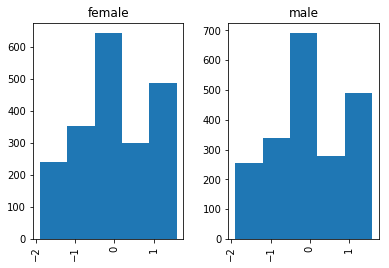

In [82]:
ess_2012['tv_tot'].hist(by=ess_2012['gender'],bins=5)

In [84]:
#Assumes Non-Normal Dist
print(stats.kruskal(
      ess_2012[ess_2012['gender']=='male']['happy'],
      ess_2014[ess_2014['gender']=='female']['happy']))

KruskalResult(statistic=0.007982424869959396, pvalue=0.9288081954348076)


The test says there is a 92.8% chance of getting our data if there were no systematic difference between being male or female and happiness so there is no significant difference in happiness by gender.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ccd2d30>,
      dtype=object)

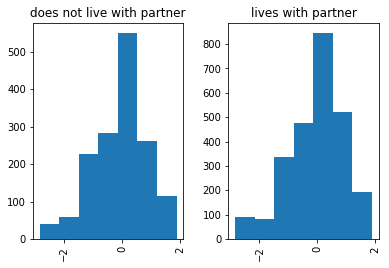

In [86]:
ess_2012['ppl_fair'].hist(by=ess_2012['partner'],bins=7)

In [90]:
#Assumes Non-Normal Dist
print(stats.ttest_ind(
      ess_2012[ess_2012['partner']=='lives with partner']['ppl_fair'],
      ess_2014[ess_2014['partner']=='does not live with partner']['ppl_fair']))

Ttest_indResult(statistic=0.5536509865278236, pvalue=0.5798489512917866)


In [91]:
#Assumes Non-Normal Dist
print(stats.kruskal(
      ess_2012[ess_2012['partner']=='lives with partner']['ppl_fair'],
      ess_2014[ess_2014['partner']=='does not live with partner']['ppl_fair']))

KruskalResult(statistic=0.9393285841226268, pvalue=0.33245057246928117)


The test says there is a 33.2% chance of getting our data if there were no systematic difference between living with a partner and not living with a partner so there is no significant difference.

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2da0f5f8>,
      dtype=object)

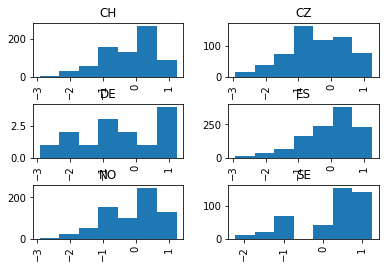

In [92]:
ess_2014['meet'].hist(by=ess_2014['country'],bins=7)

In [95]:
#Assumes Non-Normal Dist
print(stats.kruskal(
      ess_2014[ess_2014['country']=='CH']['meet'],
      ess_2014[ess_2014['country']=='CZ']['meet'],
      ess_2014[ess_2014['country']=='DE']['meet'],
      ess_2014[ess_2014['country']=='ES']['meet'],
      ess_2014[ess_2014['country']=='NO']['meet']))

KruskalResult(statistic=95.07864192210488, pvalue=1.0965512383325889e-19)


The test says there is a 110% chance of getting our data if there were no systematic difference between the countries, so there is no significant difference between the countries in terms of how often people met socially.

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ea6a320>,
      dtype=object)

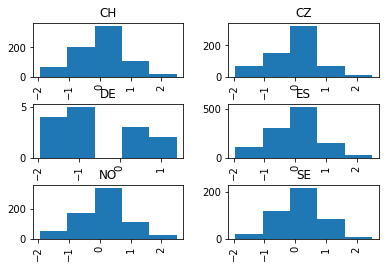

In [105]:
ess_2014['rel_act'].hist(by=ess_2014['country'],bins=5)

In [101]:
#Assumes Normal Dist
print(stats.f_oneway(
      ess_2014[ess_2014['country']=='CH']['rel_act'],
      ess_2014[ess_2014['country']=='CZ']['rel_act'],
      ess_2014[ess_2014['country']=='DE']['rel_act'],
      ess_2014[ess_2014['country']=='ES']['rel_act'],
      ess_2014[ess_2014['country']=='NO']['rel_act']))


F_onewayResult(statistic=3.553592442333773, pvalue=0.006719993265191886)


In [108]:
print('CH vs CZ')
print(stats.ttest_ind(
      ess_2014[ess_2014['country']=='CH']['rel_act'],
      ess_2014[ess_2014['country']=='CZ']['rel_act'],))

print('\nCH vs DE')
print(stats.ttest_ind(
      ess_2014[ess_2014['country']=='CH']['rel_act'],
      ess_2014[ess_2014['country']=='DE']['rel_act'],))

print('\nCH vs ES')
print(stats.ttest_ind(
      ess_2014[ess_2014['country']=='CH']['rel_act'],
      ess_2014[ess_2014['country']=='ES']['rel_act'],))

print('\nCH vs NO')
print(stats.ttest_ind(
      ess_2014[ess_2014['country']=='CH']['rel_act'],
      ess_2014[ess_2014['country']=='NO']['rel_act'],))


print('\nCZ vs DE')
print(stats.ttest_ind(
      ess_2014[ess_2014['country']=='CZ']['rel_act'],
      ess_2014[ess_2014['country']=='DE']['rel_act'],))

print('\nCZ vs eES')
print(stats.ttest_ind(
      ess_2014[ess_2014['country']=='CZ']['rel_act'],
      ess_2014[ess_2014['country']=='ES']['rel_act'],))

print('\nCZ vs NO')
print(stats.ttest_ind(
      ess_2014[ess_2014['country']=='CZ']['rel_act'],
      ess_2014[ess_2014['country']=='NO']['rel_act'],))


print('\nDE vs ES')
print(stats.ttest_ind(
      ess_2014[ess_2014['country']=='DE']['rel_act'],
      ess_2014[ess_2014['country']=='ES']['rel_act']))

print('\nDE vs NO')
print(stats.ttest_ind(
      ess_2014[ess_2014['country']=='DE']['rel_act'],
      ess_2014[ess_2014['country']=='NO']['rel_act']))


print('\nES vs NO')
print(stats.ttest_ind(
      ess_2014[ess_2014['country']=='ES']['rel_act'],
      ess_2014[ess_2014['country']=='NO']['rel_act']))

CH vs CZ
Ttest_indResult(statistic=1.3906300663502855, pvalue=0.1645646341209222)

CH vs DE
Ttest_indResult(statistic=2.2024847022215224, pvalue=0.027932609348302842)

CH vs ES
Ttest_indResult(statistic=0.7106430355677087, pvalue=0.4773937085030078)

CH vs NO
Ttest_indResult(statistic=-1.580697714694979, pvalue=0.11416466654183602)

CZ vs DE
Ttest_indResult(statistic=1.9993413355159833, pvalue=0.04599774340227696)

CZ vs eES
Ttest_indResult(statistic=-0.8070913120128292, pvalue=0.4197231170033746)

CZ vs NO
Ttest_indResult(statistic=-2.911846675155546, pvalue=0.0036527815550977723)

DE vs ES
Ttest_indResult(statistic=-2.0419467001812186, pvalue=0.04138478451756721)

DE vs NO
Ttest_indResult(statistic=-2.496177322481178, pvalue=0.012775001641391337)

ES vs NO
Ttest_indResult(statistic=-2.412991755139926, pvalue=0.015918959703544084)


Looks like DE and NO might be outliers to the other countries in terms of relative activity!